# HW 1 - Getting started with Python

Homework 1 is supposed to be a slightly more sophisticated starter homework into python, image processing, and linear algebra. You'll revise how to implement functions as external python-files and import and use them in jupyter notebooks.

A big focus is also on learning how to use matplotlib since visualization skills are key skills you will need to acquire during 597. Computational photography includes two words, "computation" and "photography." Of course, quantifying data and results with numbers is essential, however, photography - by its name - implies that it is a visual discipline. We're evaluating images, and it's utterly important to meticulously visualize every little step in the pipeline you are developing.

In this course, we're not only interested in seeing input data and the processed results, but we also want to know what you're doing inside the pipeline. Please keep this in mind when you're designing the report for each homework.

## A few notes on Jupyter Notebook

If this class is the first time you've ever used Python and Jupyter Notebook, please refer to the following tutorials before starting the homework.

## Introduction to Python
1. Excellent Documentation that shows you the essentials: https://www.w3schools.com/python/default.asp
2. Interactive tutorial in browser:  https://www.learnpython.org/

## Introduction to Jupyter
In recent years, Jupyter Notebook/Labs have emerged as an essential tool for many data scientists and researchers. We recommend using Jupyter to test out small snippets of codes inside Jupyter Cells until they function correctly. Once tested out inside Jupyter, you can copy the complete function body over to the external .py cell for extensive testing.

Here are a few references on Jupyter Notebook that might be helpful if you're new to it:
1. https://realpython.com/jupyter-notebook-introduction/
2. Video Tutorial: https://www.youtube.com/playlist?list=PL1m-6MPBNAZfF-El7BzqaOrCrTBRgH1Nk

# How to complete this assignment

*This assignment consists of several sections focusing on different image processinng skills. For each of them, there are coding part and questions. You need to implement all coding tasks. For questions, you don't need to write answers for all of them in the report. Some of them help you to think about the problems. We have listed the questions that you need to answer in the report at the end of this file. To achieve a passing grade, you must successfully complete all of the coding tasks, AND you must write up your results in a well-documented report.*   

## <span style="color:red">Coding Tasks: </span>
You will implement functions in the following python files:
- src/imageprocessing.py
- src/optics.py


# A note for matlotlib: 

We're going to use matplotlib to plot a lot, and we're going to want to use colormap/colorbars to next to our plots, but they get buggy, and aren't usually the correct size to the graph. Use this following solution to fix it!

https://stackoverflow.com/questions/18195758/set-matplotlib-colorbar-size-to-match-graph


# Warning: Possibly Import of additional packages might be necessary

You might need to import the packages in the src-files as well if you need them. If you want to use additional packages, feel free to do so.

# Getting started with the homework

In [1]:
# These are a few packages to load that might come in handy for the homework

# Note: If any of those packages cannot be loaded, simply install them using 
# PIP or Conda. Just google "pip install PACKAGE name", and you'll find more information on
# how to do this

In [2]:
import numpy as np # Numpy is doing linear algebra and all the math for us
import random # Random to create random numbers
import matplotlib.pyplot as plt # matplotlib allows us to plot images and graphs
import PIL # PIL is an image library
import cv2 # cv2 is an image processing library
import skimage # skimage is another image procssing library
import skimage.transform
import scipy

In [3]:
# Information on autoreload which will be important to update your modules 
# when you change them so that they work in the jupyter notebook
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

# These are the functions that you will have to implement

In [4]:
# There are 3 different files inside the src folder: image processing, and optics
# All 3 files contain functions that you will have to implement to pass this assignment

# This notebook will guide you chronically through all functions, and whenever a function is not yet implemented, you will run into a "RaiseNoteImplemented" error
# If this error occurs, navigate inside your Jupyter Lab to the python file 
# and read the function description that you'll have to implement then

In [5]:
import src.optics as optics
import src.imageprocessing as ip

# Let's start with some very simple image processing

In this part of homework 1 you will learn basic image processing tasks. There are several functions you have to implement, and we have provided simple pytests that are checking that the functions are doing the job.

However, once you try to visualize these images, you should immediately see if something goes wrong.

<class 'numpy.ndarray'>
float32
(1200, 2265, 3)
1.0


FileNotFoundError: [Errno 2] No such file or directory: '/output/Northwestern_Skyline.png'

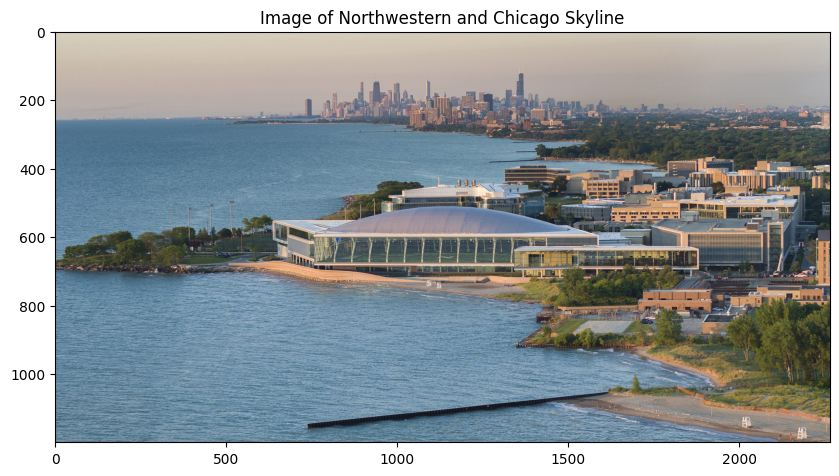

In [6]:
# Load image neeeds to be implemented
I = ip.load_image("images/northwestern.jpg") 

# According to the function description 
# following properties must be true when printed
print(type(I)) # Should be <class 'numpy.ndarray'>
print(I.dtype) # Should be float32
print(I.shape) # Should be (1200, 2265, 3) for the chicago image
print(I.max()) # Should be 1.0 (since it is scaled) for the chicago image

plt.figure(figsize=(10,10))
plt.imshow(I)
plt.title("Image of Northwestern and Chicago Skyline")
ip.save_fig_as_png("Northwestern_Skyline")

In [ ]:
# This is a function that will save the current output 
# You find the description in ImageProcessing.py
ip.save_fig_as_png("Northwestern_Skyline")


In [ ]:
# Crop the images, should be of size (250, 1000, 3)
I_Chicago = ip.crop_chicago_from_northwestern(I)

print(type(I_Chicago)) # Should be <class 'numpy.ndarray'>
print(I_Chicago.dtype) # Should be float32
print(I_Chicago.shape) # Should be (250, 1000, 3)

plt.imshow(I_Chicago)
plt.title("Skyline of Chicago")

ip.save_fig_as_png("Chicago_Skyline")


In [ ]:
I_chicago_gray = ip.convert_rgb2gray(I_Chicago)

print(type(I_chicago_gray)) # Should be <class 'numpy.ndarray'>
print(I_chicago_gray.dtype) # Should be float32
print(I_chicago_gray.shape) # Should be (250, 1000) or (250, 1000,1)

plt.imshow(I_chicago_gray,cmap='gray')
plt.title("Skyline of Chicago in Gray")

ip.save_fig_as_png("Chicago_Skyline_gray")

In [ ]:
I_downsampled = ip.downsample_by_scale_factor(I_chicago_gray,8)

print(type(I_downsampled)) # Should be <class 'numpy.ndarray'>
print(I_downsampled.dtype) # Should be float32
print(I_downsampled.shape) # Should be for downsampling facto of 8 (31, 125)

plt.imshow(I_downsampled,cmap='gray')
plt.title("A downsampled version of the Chicago skyline")

ip.save_fig_as_png("Chicago_Skyline_downsampled")

In [ ]:
plt.figure(figsize=(15,5))

# This should show the chicago skyline a subplot (2 x 2) for diufferent scale factors
ip.plot_chicago_skyline(I_chicago_gray)

ip.save_fig_as_png("Chicago_Skyline_downsampled_multiple_images")

The final image should somewhat look like this:

![Title](example_results/Chicago_Skyline_downsampled_multiple_images.png)

## <span style="color:red">Coding Task: Implement the same procedure for your own image</span>

Now that you've implemented basic image processing tools, please download an image of your choice and do the same experiments as we've done here. I.e., that you should do image loading, cropping, converting from RGB to gray and show a subplot with different downsampling scales.
<br>
Please include these images in your project report.

In [ ]:
# Loading Image
sharing_tech_img = ip.load_image('images/sharing_tech_logo.png')
plt.figure(figsize=(10,10))
plt.imshow(sharing_tech_img)
plt.title("Image of Sharing Tech Ltd.")

ip.save_fig_as_png("Sharing_Tech_Image")

In [ ]:
# Cropping image
sharing_tech_logo = ip.crop_logo_from_image(sharing_tech_img)
plt.imshow(sharing_tech_logo)
plt.title("Sharing Tech Logo")

ip.save_fig_as_png("Sharing_Tech_Logo")

In [ ]:
logo_gray = ip.convert_rgb2gray(sharing_tech_logo)

plt.imshow(logo_gray,cmap='gray')
plt.title("Sharing Tech Logo in Gray")

ip.save_fig_as_png("Logo_gray")

In [ ]:
plt.figure(figsize=(15,5))

# This should show the chicago skyline a subplot (2 x 2) for diufferent scale factors
ip.plot_chicago_skyline(logo_gray)

ip.save_fig_as_png("Sharing_Tech_logo_downsampled_multiple_images")

# <span style="color:Orange"> Image Processing : Overlay Images</span>

In this problem, we will play around with simple image processing algorithms. In particular, we will first load an image of a dog with a transparent background. Subsequently, we will overlay this image on top of a picture of a natural landscape.

First, we will play around with resizing and rotating images. Afterward, we will put our functions into a broader framework, which again is composed of several parts.

This assignment aims to familiarize you with NumPy, skimage, cv2, and other packages that will come in handy in the future assignments.

After we've learned these basic image processing tools, we will use the blur estimation functions discussed in Lecture 2 to estimate different blur kernels for background and foreground. We then simulate the effect of portrait photos that appear naturally in DLSR cameras or are simulated for nicer effects in modern smartphones.

## 1. Load the image

First, we have to revisit the function that can load an image that you should have already implemented at the beginning of the assignment.

However, note that we are now dealing not only with 3 channels for RGB (Red-Green-Blue) but with a fourth channel, called alpha, which controls the transparency in each pixel.

An alpha value of $0$ would correspond to no transparency, an alpha value of $1$ would be fully transparent.

Luckily, matplotlib knows how to automatically deal with an alpha channel and take care of this when we want to display an image.

In [ ]:
I_dog = ip.load_image('images/dog2.png')
print(I_dog.shape) # Should be (995, 800, 4)
print(I_dog.dtype) # Should show 'float32'
print(I_dog.max()) # Shoud be normalized to 1

plt.imshow(I_dog)
plt.title("The original image as it was saved")
# You should see a dog with a white background

## 2. Pad Dog Image with Zeros

We are padding the dog images because we might need to blur the dog image later. In order to not have boundary effects when blurring we're padding with zeros.

In [ ]:
pad_size = 100
I_dog_padded = ip.pad_image(I_dog,pad_size)
# Confirm that shape has changed
print(I_dog_padded.shape) # (Should be 1195, 1000, 4) with pad_size = 100
print(I_dog_padded.dtype) # Should still be a float32

plt.imshow(I_dog_padded)
plt.title("Padded Dog Image")
# You should see the same image of the dog but now there should be more white areas around the dog

ip.save_fig_as_png("padded_dog_image")

The padded image should somewhat look like this:

![Title](example_results/padded_dog_example.png)

## 3. Resize Image

We want to change the size of the dog image flexible to make a "nicer" composition of our final image. 
Sidenote: If we know the size of an average dog we can actually scale it so that it fits well with our actual camera paramters that we will choose later.

In [ ]:
I_dog = ip.rescale(I_dog_padded,0.9)
# I_dog = skimage.transform.rescale(I_dog_padded, scale=0.9, anti_aliasing=False, channel_axis=-1)



plt.imshow(I_dog)
plt.title("Rescaled Dog")

## 4. Load the background image

Now we are loading the background image. If everything is implemented well, we should be able to reuse the function we already for this.

In [ ]:
I_canyon = ip.load_image('images/yosemite.jpg')
# The image is pretty, large we should downscale it for easier processing
I_canyon = ip.rescale(I_canyon,0.25)
print(I_canyon.shape)
print(I_canyon.dtype)
plt.figure(figsize=(15,15))
plt.imshow(I_canyon)

The canyon image doesn't yet have an alpha channel. We need to add another axis. You'll have to implement a small method called "add_alpha_channel"

In [ ]:
I_canyon = ip.add_alpha_channel(I_canyon)
print(I_canyon.shape)
print(I_canyon.dtype)
plt.imshow(I_canyon)

In [ ]:
# Let us also visualize the alpha channel of the dog to make sur that it looks good/ as expected.
# If this doesn't look like a segmentation mask, something is wrong and you need to revisit
# your load_image function

mask = I_dog[:,:,3]
plt.imshow(mask,cmap='gray')
plt.title("Alpha Channel of dog")
plt.colorbar()

The alpha channel should look somewhat like this for the dog

![Title](example_results/alpha_channel.png)

## Task: Overlay images of same size

In [ ]:
# First let us rescale the dog image because it is quite large
I_dog_rescaled = ip.rescale(I_dog,0.5)
I_dog_rescaled.shape

In [ ]:
# For testing purposes let us crop out an image of the background which has exactly the
# Same dimension as the rescaled dog
x0 = 0
y0 = 0
I_overlay = I_canyon
I_overlay = I_overlay[x0:x0+I_dog_rescaled.shape[0],y0:y0+I_dog_rescaled.shape[1],:]
print(I_overlay.shape)
plt.imshow(I_overlay)

In [ ]:
# Now you have to implement a function that overlays to images of the same size
# where the second images contains the alpha-channel mask which you need
# to account correctly for

# WARNING: DO NOT SHRINK THE DOG
# WARNING: DO NOT PLACE THE DOG ON TOP OF THE MOUNTAIN
# WARNING: TAKE CARE OF THE BOUNDARIES.

I_test_overlay = ip.overlay_two_images_of_same_size(I_overlay,I_dog_rescaled)

# When you visualize this you should now see a Dog with the canyon image in the backgroud
# If this looks weird you'll have to revisit either the load_image function or 
# the overlay_two_images_of_same_size function that you just implemented
plt.imshow(I_test_overlay)

The overlayed image for same size should somewhat look like this

![Title](example_results/overlayed_same_size.png)

# Overlay imags of arbitrary sizes
Now that we've learned how to overlay two images of the same size, we're going to look into how to overlay two images of arbitrary sizes.

In [ ]:
# These are some of the image data dimensions. Please think of why this might be problematic. This can help yoi when implementing the overlay function

print("Dog shape: " + str(I_dog.shape))
print("Background shape: " + str(I_canyon.shape))
print(I_dog.shape > I_canyon.shape)

In [ ]:
# For the location settings below the dogs feet shut be cut off since the feet would extend over the boundary of the canyon image
# This is intened, because otherwise it would appear that the dog is floating in "air"
# Feel free to play around with the location settings. For the image in your report try to avoid a "floating" dog
# And have it appears as natural as possible
I_canyon = ip.load_image('images/yosemite.jpg')
# The image is pretty, large we should downscale it for easier processing
I_canyon = ip.rescale(I_canyon,0.25)
I_canyon = ip.add_alpha_channel(I_canyon)

plt.figure(figsize=(10,10))
plt.imshow(I_canyon)

x0 = 150
y0 = 400
I_new = ip.overlay_two_images(I_canyon,I_dog,[x0,y0])
plt.figure(figsize=(10,10))
plt.imshow(I_new)
plt.title("Overlayed Image without any focus settings")

In [ ]:
I_logo = ip.load_image('images/sharing_tech_logo.png')
# The image is pretty, large we should downscale it for easier processing
#I_canyon = ip.rescale(I_canyon,0.25)
print(I_logo.shape)
#I_logo = ip.add_alpha_channel(I_logo)

plt.figure(figsize=(10,10))
plt.imshow(I_logo)

I_dog2 = ip.load_image('images/dog.png')
I_dog2 = ip.rescale(I_dog2,1.2)

x0 = 600
y0 = 700
I_new2 = ip.overlay_two_images(I_logo,I_dog2,[x0,y0])
plt.figure(figsize=(10,10))
plt.imshow(I_new2)
plt.title("Overlayed Image without any focus settings")

## <span style="color:red">Coding Task: Implement Dog overlayed with Yosemite</span>

At this point you should see a dog that sits infront of a yosemite landscape. If this doesn't look well, please play around with the function we've asked you to implement. Don't proceed until this works well

# Hint:

Your overlayed image should look something like this (Pay attention to the paws)

![Title](example_results/overlayed_image_example.png)

# <span style="color:Orange"> Image Formation of a Camera System (e.g. DLSR) with Defocus </span>

We'll be implementing a simpler version of the DoF simulator 
from https://dofsimulator.net/en/

Please go there and play around with it to get a feeling for how DoF works

# These are the formulas from the lecture that you'll need for this homework

![Title](defocus_blur.jpeg)

$$ \frac{b}{D}=\frac{|i' - i|}{i'}$$

Lens Maker Formula:

$$ \frac{1}{i} + \frac{1}{o} = \frac{1}{f} $$

$$b=\frac{D}{i'}\cdot |i' - i| =D | \frac{f(o-o')}{o'(o-f)} | $$ 

### We're using a DLSR with a Canon EF-mount for our simulation
Information on Flange-Focal distance: https://en.wikipedia.org/wiki/Flange_focal_distance
<br>
Information on https://en.wikipedia.org/wiki/Canon_EF_lens_mount
<br>
Full frame Camera: https://en.wikipedia.org/wiki/Full-frame_digital_SLR

In [ ]:
# All units will be in mm
m = 1000 # m in mm

In [ ]:
sensor_size_mm = np.array([24,36]) # mm
print(sensor_size_mm)
flange_focal_distance = 44.00 # mm

## <span style="color:red">Coding Task:  Adjust the aspect ratio of the image</span>

The image of the background has a specific aspect ratio given by the ratio of #pixels in x and y dimension.

However, this aspect ratio might not match with the aspect ratio of the camere chip, which is given by actual size of the chip in x and y direction. We have stored these data for a common image format above in the variable sensor_size_mm.

Please implement the crop_background_image_sensor_ratio function to align the background image with the actual sensor aspect ratio.

In [ ]:
I_canyon = ip.load_image('images/yosemite.jpg')
# The image is pretty, large we should downscale it for easier processing
I_canyon = ip.rescale(I_canyon,0.25)
I_canyon = ip.add_alpha_channel(I_canyon)

I_background = optics.crop_background_image_sensor_ratio(sensor_size_mm,I_canyon)
plt.imshow(I_background)

# Some definitions of your optical system:

In [ ]:
# Focal Length
focal_length = 50 # mm
# F-number
N = 4
# Aperture Diameter
D = focal_length/N # mm
# Focus Distance
o_foc = 1.5*m # mm
# Object Distance
o_obj = 1.5*m # mm
# Let's assume that the background is really far away, e.g. 1km away. 
o_background = 1000*m

In [ ]:
b_object = optics.calc_blur_radius(focal_length,D,o_foc,o_obj)
print("Blur Radius: " + str(b_object) + " mm")

In [ ]:
b_background =  optics.calc_blur_radius(focal_length,D,o_foc,o_background)
print("Blur Radius: " + str(b_background)+ " mm")

# Calculate blur ratios
Now we know the approximate blur radii for different image distances. 
What we have to do next, is the define how large the images actually are, so that we know what is the physical size of a pixel of the 2 images.

This will help us to convert into how much we have to blur both images to approximate the correct amount of optical blur.

In [ ]:
# Let's define how large the images are

angular_field_of_view = optics.calc_angular_field_of_view(sensor_size_mm,focal_length)
print("Angular field of view: " + str(angular_field_of_view) + " deg")
field_of_view_object = optics.calc_field_of_view(sensor_size_mm,o_obj,focal_length)
print("Field of View (Object): " + str(field_of_view_object/m) + " m" )
field_of_view_background = optics.calc_field_of_view(sensor_size_mm,o_background,focal_length)
print("Field of View (Background) " + str(field_of_view_background/m) + " m" )

I_dog_real_height = 0.5*m
I_dog_real_width = I_dog.shape[1]/I_dog.shape[0] * I_dog_real_height
print(I_dog_real_width)

In [ ]:
pixel_size_background = sensor_size_mm[0]/I_background.shape[0]
pixel_size_foreground = sensor_size_mm[0]/I_dog.shape[0]

print("Pixel Size - Background: " + str(pixel_size_background))
print("Pixel Size - Foreground: " + str(pixel_size_foreground))


blur_radius_background_pixel = b_background/pixel_size_background
blur_radius_foreground_pixel = b_object/pixel_size_foreground

print("Blur Radius Background: " + str(blur_radius_background_pixel))
print("Blur Radus Foreground: " + str(blur_radius_foreground_pixel))



Let's calculate how much 1 pixel for background and foreground is in unit millimeters [mm]

# create disk-like filter footprint with given radius

In [ ]:
# Now we create a radial distance map. It should be 0 in the center and the values increase radially symmetric
# If the dimension is e.g. 100 pixels, the maximum value would be sqrt(2)*50 which is around 74

R = optics.create_radial_distance_map(100)
plt.imshow(R)
plt.colorbar()
print(R.shape)

The radial distance map should look likle this:

![Title](example_results/radial_map.png)

In [ ]:
# Now we have to calculate the point-spread-function
# Read more on PSFs here: https://en.wikipedia.org/wiki/Point_spread_function

PSF = optics.gaussian_psf(R,blur_radius_background_pixel)

print(PSF.sum()) # should sum up to 1, otherwise energy is lost
print(PSF.shape) # should be the same size as the radial map you generated earlire
plt.imshow(PSF)
plt.colorbar()


The gaussian PSF shoiuld look like this:

![Title](example_results/gaussian_psf.png)

In [ ]:
# Now we need to conolve the background image with the Point Spread Function. 
# Please implement the convolution. Note that you're allowed to use external packages

im_filtered = optics.convolve_image(I_background,PSF)

print(I_background.shape)
print(im_filtered.shape)

In [ ]:
I_logo = ip.load_image('images/sharing_tech_logo.png')
im_filtered2 = optics.convolve_image(I_logo,PSF)

print(im_filtered.shape)
plt.imshow(im_filtered2)

In [ ]:
plt.imshow(im_filtered)

In [ ]:
# Define a good place where you want to center the second image
x0 = 150
y0 = 400

In [ ]:
I_new = ip.overlay_two_images(im_filtered,I_dog,[x0,y0])
plt.imshow(I_new)

In [ ]:
x0 = 600
y0 = 700

I_new2 = ip.overlay_two_images(im_filtered2,I_dog2,[x0,y0])
plt.imshow(I_new2)

Hint: The final image should somewhat look like this:

Checkpoints for you:
- The dog should not float in the air
- The background should be blurred
- The object should not be blurred

![Title](example_results/simulated_focus_image.png)